# Lecture 10: Classification and Logistic Regression

In [ ]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model as sk

/Users/krader/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


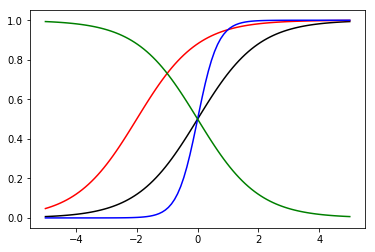

In [2]:
x = np.linspace(-5, 5, 100)
y1 = np.exp(0+1*x)/(1+np.exp(0+1*x))
y2 = np.exp(2+1*x)/(1+np.exp(2+1*x))
y3 = np.exp(0+3*x)/(1+np.exp(0+3*x))
y4 = np.exp(0-1*x)/(1+np.exp(0-1*x))


plt.plot(x,y1,color='black')
plt.plot(x,y2,color='red')
plt.plot(x,y3,color='blue')
plt.plot(x,y4,color='green')

plt.show()

In [19]:
import random
random.seed(12345)

#read the NFL play-by-play data
nfldata = pd.read_csv("NFLplaybyplay-2015.csv")

# shuffle the data
nfldata = nfldata.reindex(np.random.permutation(nfldata.index))

# For simplicity, we will select only 500 points form the dataset.
N = 500
nfldata_sm = nfldata.sample(N)
nfldata_sm.head()


#genomicdata = pd.read_csv("genomic_subset.csv")
#genomicdata.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
5646,2016010300,1/3/16,2,11,14,BUF,NYJ,4,11,29,...,0,0,NaN,29,OWN,1,BUF,0,UNSPORTSMANLIKE CONDUCT,15
38474,2015121305,12/13/15,3,14,7,KC,SD,3,2,30,...,0,0,LEFT END,30,OWN,1,SD,0,UNNECESSARY ROUGHNESS,15
8756,2015091309,9/13/15,2,0,0,NaN,BAL,0,0,0,...,0,0,NaN,0,OWN,0,NaN,0,NaN,0
11810,2015092011,9/20/15,2,4,55,MIA,JAC,1,10,18,...,0,0,NaN,18,OWN,0,NaN,0,NaN,0
13400,2015092704,9/27/15,3,14,19,SD,MIN,2,3,27,...,0,0,RIGHT END,27,OWN,0,NaN,0,NaN,0


Estimated beta1: 
 [[ 0.05131007]]
Estimated beta0: 
 [-6.88377071]


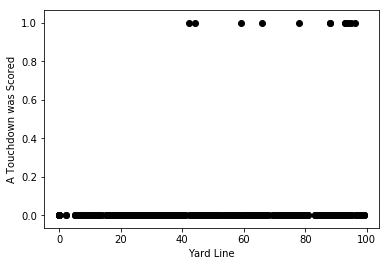

In [21]:

# The following function creates the polynomial design matrix.
def polynomial_basis (x, degree):
    p = np.arange (1, degree + 1)
    return x[:, np.newaxis] ** p

# We create the design matrix of a polynomial of 1 degree.
X = polynomial_basis (nfldata_sm["YardLine"], 1)

plt.scatter(nfldata_sm["YardLine"],nfldata_sm["IsTouchdown"],  color='black')
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")
#plt.plot(x, logitm.predict_proba(x)[:,1],  color='red' , lw=3)
#plt.show()

# Create linear regression object
lm = sk.LinearRegression()
lm.fit (X, nfldata_sm["IsTouchdown"])

# The coefficients
#print('Coefficients: \n', lm.coef_)

# Create logistic regression object
logitm = sk.LogisticRegression(C = 1000000)
logitm.fit (X, nfldata_sm["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

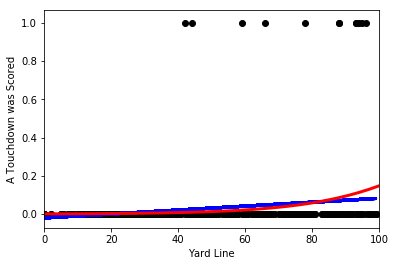

In [23]:

# Plot outputs
plt.scatter(nfldata_sm["YardLine"],nfldata_sm["IsTouchdown"],  color='black')
plt.xlim(0,100)
plt.plot(X, lm.predict(X), color='blue',lw=3)
x = np.linspace(0, 300, 100)
x = polynomial_basis (x, 1)
#plt.plot(x, logitm.predict_proba(x),  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x)[:,1],  color='red' , lw=3)
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")

plt.show()


In [24]:
X2 = polynomial_basis (nfldata_sm["IsPass"], 1)
logitm.fit (X2,nfldata_sm["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Y=nfldata_sm["IsTouchdown"]
#passes=nfldata["IsPass"0]==0
print(np.mean(Y[nfldata["IsPass"]==0]))
print(np.mean(Y[nfldata["IsPass"]==1]))


Estimated beta1: 
 [[ 1.13460434]]
Estimated beta0: 
 [-4.30743637]
0.013289036544850499
0.04020100502512563


In [25]:
# Create data frame of predictors
X = nfldata[["YardLine","IsPass"]]

# Create logistic regression object
logitm = sk.LogisticRegression(C = 1000000)
logitm.fit (X, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1, beta2: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1, beta2: 
 [[ 0.06547811  1.2066147 ]]
Estimated beta0: 
 [-8.30059191]


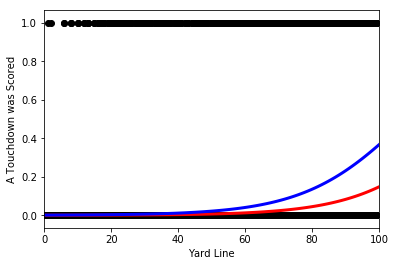

In [13]:
x = np.linspace(0, 100, 100)
x = polynomial_basis (x, 1)
x0 = np.insert(x,1,0,axis=1)
x1 = np.insert(x,1,1,axis=1)

# Plot outputs
plt.scatter(nfldata["YardLine"],nfldata["IsTouchdown"],  color='black')
plt.plot(x, logitm.predict_proba(x0)[:,1],  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x1)[:,1],  color='blue' , lw=3)
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")
plt.xlim(0,100)
plt.show()

In [14]:
# Create data frame of predictors
nfldata['Interaction'] = nfldata["YardLine"]*nfldata["IsPass"]
X = nfldata[["YardLine","IsPass","Interaction"]]

# Create logistic regression object
logitm = sk.LogisticRegression(C = 100000000000000000)
logitm.fit (X, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1, beta2, beta3: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

nfldata['Intercept'] = 1.0
logit_sm = sm.Logit(nfldata['IsTouchdown'], nfldata[["Intercept","YardLine","IsPass","Interaction"]])
fit_sm = logit_sm.fit()
print(fit_sm.summary())

nfldata.head()

       YardLine  IsPass  Interaction
46259        57       0            0
3778         73       1           73
20707        34       0            0
45826        83       1           83
10982        78       1           78
Estimated beta1: 
 [[ 0.06769992  1.46499967 -0.00319916]]
Estimated beta0: 
 [-8.48339235]
Optimization terminated successfully.
         Current function value: 0.102461
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            IsTouchdown   No. Observations:                46277
Model:                          Logit   Df Residuals:                    46273
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Oct 2017   Pseudo R-squ.:                  0.2503
Time:                        09:06:32   Log-Likelihood:                -4741.6
converged:                       True   LL-Null:                       -6324.5
                              

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Interaction,Intercept
46259,2016010315,1/3/16,4,11,20,STL,SF,2,4,57,...,LEFT TACKLE,43,OPP,0,NaN,0,NaN,0,0,1.0
3778,2015122000,12/20/15,1,1,33,NYG,CAR,1,10,73,...,NaN,27,OPP,0,NaN,0,NaN,0,73,1.0
20707,2015101801,10/18/15,4,3,50,NYJ,WAS,2,10,34,...,CENTER,34,OWN,0,NaN,0,NaN,0,0,1.0
45826,2016010303,1/3/16,2,1,2,PIT,CLE,2,10,83,...,NaN,17,OPP,0,NaN,0,NaN,0,83,1.0
10982,2015092006,9/20/15,2,1,15,CHI,ARI,1,10,78,...,NaN,22,OPP,0,NaN,0,NaN,0,78,1.0
